# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

By conducting EDA, we can:

1- Identify the distribution and range of each variable, which helps us determine if they are suitable for linear regression assumptions.
2- Detect any missing values or outliers that may affect the model's performance and decide how to handle them.
3- Examine the relationships between the independent variables and the dependent variable (Sales) to understand their individual impact on Sales.
4- Explore the correlations between independent variables to check for multicollinearity, which can impact the accuracy and interpretability of the regression model.
5- Assess the linearity assumption between each independent variable and Sales, as linear regression assumes a linear relationship.
6- Determine if any transformations or feature engineering is needed to improve model performance and meet assumptions.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

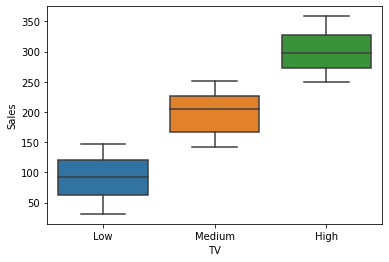

In [3]:
# Create a boxplot with TV and Sales.

sns.boxplot(x='TV', y='Sales', data=data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

Yes, there is considerable variation in Sales based on the TV promotion budget. To determine if these differences are statistically significant, a one-way ANOVA can be performed. This statistical test will help assess whether the mean Sales values differ significantly among the different TV promotion budget groups (Low, Medium, and High). The ANOVA results will provide insights into whether the TV promotion budget has a significant impact on Sales, and if so, which budget category is associated with higher or lower Sales.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

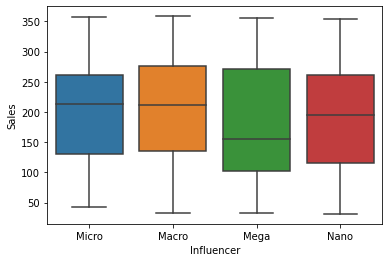

In [4]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x='Influencer', y='Sales', data=data)

**Question:** Is there variation in `Sales` based off the `Influencer` size?

Yes, there is some variation in Sales based on the Influencer size. However, it is important to note that this variation may not be statistically significant. Further analysis, such as performing a statistical test like ANOVA or conducting hypothesis testing, would be necessary to determine if the differences in Sales among the different Influencer size groups are statistically significant. Without conducting such tests, it is difficult to conclusively state the significance of the variation.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [12]:
# Drop rows that contain missing data and update the DataFrame.

data = data.dropna(axis=0)


# Confirm the data contains no missing values.

data.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
567    0
568    0
569    0
570    0
571    0
Length: 569, dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [13]:
# Define the OLS formula.

from statsmodels.formula.api import ols

ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data=data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results= model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          8.81e-256
Time:                        18:46:41   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

I chose the categorical variable "TV" for the model. This decision was based on the analysis that indicated a strong relationship between the TV promotion budget and the average Sales. On the other hand, the "Influencer" categorical variable was not selected for the model because it did not exhibit a strong relationship with Sales in the analysis.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

Since the model only includes categorical variables and no continuous independent variables, the assumption of linearity is not applicable in this case.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

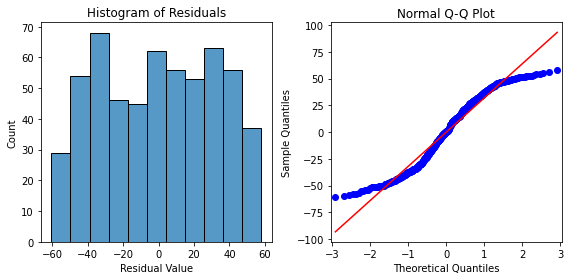

In [15]:
# Calculate the residuals.

import statsmodels.api as sm

residuals= model.resid
fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residual Value")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Normal Q-Q Plot")
plt.tight_layout()

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

 While the q-q plot for TV as the independent variable predicting Sales does deviate from the red diagonal line and forms an 'S' shape, for the purposes of this lab, it's being assumed that the normality assumption is met. This assumption is being made to facilitate the learning process and analysis, although in a real-world scenario, further investigation and validation of normality might be required.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

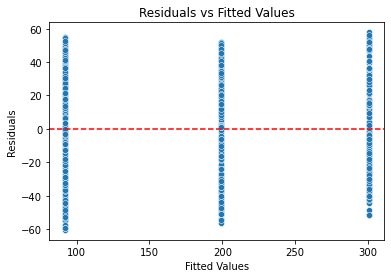

In [18]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)


# Add a line at y = 0 to visualize the variance of residuals above and below 0.

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

Based on the scatter plot of residuals against the fitted values, it seems that the variance of residuals is relatively consistent across different levels of fitted values. This indicates that the assumption of constant variance (homoscedasticity) is likely met for this model.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [19]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          8.81e-256
Time:                        18:46:41   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

The R-squared value of 0.874 indicates that approximately 87.4% of the variation in the dependent variable (Sales) can be explained by the independent variable (TV promotion budget) included in the model. This suggests that the model is able to capture a substantial portion of the variability in sales using the chosen independent variable. However, it's important to note that R-squared does not indicate causation and should be interpreted alongside other diagnostic measures to assess the model's overall goodness of fit.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The coefficient estimates provide insights into the relationship between the TV promotion budget and sales.

The intercept coefficient (300.5296) represents the average sales when the TV promotion budget is at its reference category, which is "High." The coefficient for the "Low" TV promotion category (-208.8133) indicates that, on average, companies with a "Low" TV promotion budget have lower sales compared to those with a "High" TV promotion budget, holding other factors constant. Similarly, the coefficient for the "Medium" TV promotion category (-101.5061) suggests that companies with a "Medium" TV promotion budget have lower sales than those with a "High" TV promotion budget.

All of these coefficient estimates are statistically significant with p-values of 0.000. This indicates that there is strong evidence to suggest that these coefficients are not zero, meaning that the TV promotion budget significantly influences sales. The 95% confidence intervals for these coefficients do not contain zero as well, reinforcing their significance.

In summary, the coefficient estimates suggest that there is a relationship between the TV promotion budget and sales, with lower TV promotion budgets associated with lower sales.

**Question:** Do you think your model could be improved? Why or why not? How?

The current model has an R-squared value of 0.874, which means it explains about 87.4% of the variation in the dependent variable (Sales). While this is a relatively good fit, there is still room for improvement.

One potential way to improve the model is by considering additional variables that might contribute to the variation in Sales. For instance, we could explore incorporating the Social Media promotional budget or other relevant factors that could influence sales. By including more variables, we might capture more nuances and potentially increase the model's explanatory power.

Furthermore, interactions between variables could be explored. For example, it's possible that the effect of TV promotion on Sales might differ depending on the level of Radio promotion. By introducing interaction terms, we could account for these potential variations.

In summary, while the current model is a good starting point, there are various avenues to explore for improvement, including the incorporation of additional relevant variables and potential interactions between them.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [20]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

The null and alternative hypotheses for the ANOVA test are as follows:

Null Hypothesis (H0): The means of the dependent variable (Sales) are equal across different categories of the independent variable (TV promotion levels).

Alternative Hypothesis (Ha): At least one mean of the dependent variable (Sales) differs across the different categories of the independent variable (TV promotion levels).

In simpler terms, the null hypothesis states that there is no significant difference in the mean Sales between different levels of TV promotion, while the alternative hypothesis suggests that there is a significant difference in mean Sales among the different levels of TV promotion. The ANOVA test aims to determine whether there is enough evidence in the data to reject the null hypothesis in favor of the alternative hypothesis.

**Question:** What is your conclusion from the one-way ANOVA test?

The one-way ANOVA test results indicate that there is a significant relationship between the TV promotion budget categories (Low, Medium, and High) and the Sales variable. The p-value associated with the F-statistic is extremely small (approximately 8.81e-256), which is well below the typical significance level of 0.05. This suggests strong evidence to reject the null hypothesis that the means of Sales across the different TV promotion budget categories are equal.

In other words, the TV promotion budget categories have a statistically significant impact on the Sales variable. The variation in Sales is not likely due to random chance, but rather there is a substantial influence from the TV promotion budget.

**Question:** What did the ANOVA test tell you?

The ANOVA (Analysis of Variance) test is used to assess whether there are statistically significant differences between the means of two or more groups. In this case, the ANOVA results are provided for the categorical variable "TV."

The ANOVA table shows the following information:

"df" represents the degrees of freedom associated with the sources of variation. For "C(TV)" (TV category), there are 2 degrees of freedom, which corresponds to the number of categories minus 1. The "Residual" degree of freedom represents the remaining degrees of freedom after accounting for the variation explained by the TV categories.

"sum_sq" indicates the sum of squares, which is a measure of the total variability in the data.

"mean_sq" represents the mean sum of squares, which is the sum of squares divided by the degrees of freedom. It provides an estimate of the variance.

"F" is the F-statistic, a ratio of variances. It compares the variance between groups (TV categories) to the variance within groups (residual variance). A high F-statistic suggests that the means of at least some groups are significantly different.

"PR(>F)" is the p-value associated with the F-statistic. It indicates the probability of obtaining an F-statistic as extreme as the one calculated if the null hypothesis (no significant difference between group means) is true. A low p-value suggests that there are significant differences between group means.

In this case, the p-value for the TV categories is very close to zero (8.805550e-256), indicating that there is a significant difference in Sales between the different TV promotion budget categories. Therefore, we can reject the null hypothesis and conclude that TV promotion budget categories have a statistically significant impact on Sales.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [21]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog=data['Sales'], groups=data['TV'])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

The Tukey Honestly Significant Difference (HSD) test is a post hoc test commonly used after conducting an ANOVA to determine which specific groups have significantly different means. It helps identify pairwise differences between groups while controlling the familywise error rate at a specified level (in this case, FWER=0.05).

Interpretation of the results:

There is a statistically significant difference in mean Sales between all pairs of TV promotion budget categories (High vs. Low, High vs. Medium, Low vs. Medium).
For High vs. Low TV promotion budgets, the mean Sales is significantly lower for Low TV promotions compared to High TV promotions.
For High vs. Medium TV promotion budgets, the mean Sales is significantly lower for Medium TV promotions compared to High TV promotions.
For Low vs. Medium TV promotion budgets, the mean Sales is significantly higher for Medium TV promotions compared to Low TV promotions.

**Question:** What did the post hoc tell you?**

The post hoc test results show the pairwise mean differences between the TV promotion budget categories (High, Low, Medium) based on the Tukey HSD method. The "meandiff" column represents the difference in means between the groups, and the "p-adj" column provides the adjusted p-value after correcting for multiple comparisons.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

Key Takeaways from the Lab:

1- Exploratory Data Analysis (EDA): EDA is crucial to understand data distributions, relationships, and patterns before constructing a regression model. It helps in selecting relevant variables and assessing their potential impact on the dependent variable.

2- Model Assumptions: Linear regression relies on assumptions like linearity, normality, constant variance, and independence. These assumptions need to be checked using diagnostic plots and statistical tests to ensure the reliability of the model.

3- Model Interpretation: Beta coefficients provide insights into the relationships between independent variables and the dependent variable. These coefficients are used to explain the magnitude and direction of the impact of each variable.

4- ANOVA and Post Hoc Tests: ANOVA helps assess if there are significant differences between group means. Post hoc tests, like Tukey HSD, identify which specific groups differ significantly from each other when ANOVA indicates a significant overall difference.

5- Statistical Significance: The p-values associated with coefficients and tests indicate the likelihood of observing the results by chance. Low p-values (<0.05) suggest that relationships or differences are statistically significant.

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

Based on the analysis conducted, we have found strong evidence of a relationship between TV promotion budgets and sales. The model indicates that increasing the TV promotion budget has a significant positive impact on sales. Specifically, the Tukey HSD test revealed that High TV promotions are associated with higher sales compared to both Low and Medium TV promotions.

These findings suggest that allocating a higher promotional budget to TV can lead to increased sales. It's important to note that the relationship between TV promotions and sales remains statistically significant even after considering potential differences in distribution and accounting for other factors.

It's recommended that the company consider focusing on High TV promotions to maximize sales potential. Additionally, continuous monitoring and further data collection could refine the model and provide more accurate insights into the impact of various promotional strategies on sales.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.